In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request


## Punto 1  
Implemente la transformada de Fourier discreta en Python, de acuerdo a la definición:
$$  
F\{t_i,y_i\} (f) = \sum ^N_{k=0} {y_k e^{-2 \pi i t_k f}}

$$

Ecuacion de Fourier solo para una frecuencia

In [6]:
def fourier(t,y,f):
    F=0
    for i in range (len(t)):
        F+=y[i]*np.exp(-2*np.pi*1j*f*t[i])
    return(F)


## Punto 2  
Genere una señal de prueba $ y(t) = \sin{(2\pi \sqrt{2𝑡})}$, con un rango temporal desde t = 0 hasta un $t = t_max$, y con 𝑁 muestras uniformemente distribuídas.
El $t_max$ y el 𝑁 son de su elección, pero deben permitir que la frecuencia de la señal sea menor al límite de Nyquist.
Grafique la norma de la transformada de Fourier para esta señal de prueba, tal que se aprecie todo el espectro.
¿Qué sucede si le agrega ruido a la señal en y?

Definicion de la funcion

In [11]:
t = np.linspace(0,20,200)
y=np.sin(2*np.pi*np.sqrt(2)*t)
y2 = y+np.random.normal(0.0,0.1,len(y))

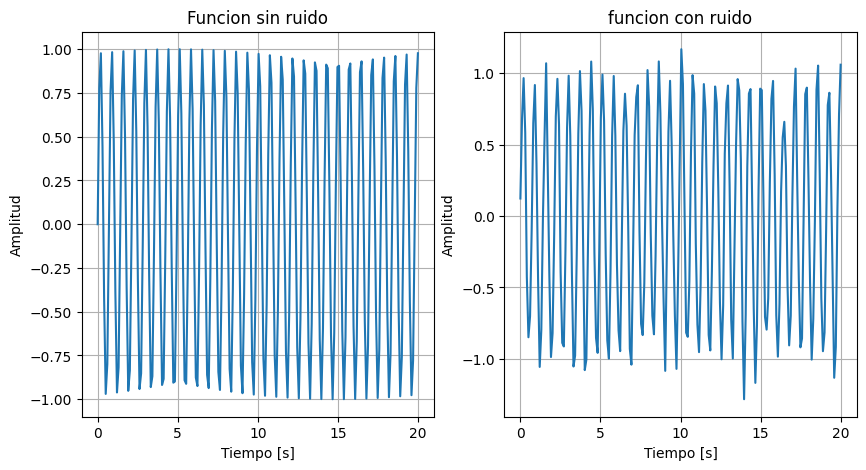

In [14]:
fig = plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.plot(t,y,"-")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Funcion sin ruido")
plt.grid()

plt.subplot(1,2,2)
plt.plot(t,y2,"-")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("funcion con ruido")
plt.grid()

In [8]:
f=49.95
print(fourier(t,y,f))

(1.783597668908214-0.16856727006325725j)


Limite Nyquist para la frecuencia

In [9]:
Ny=1/((t[1]-t[0]))
Ny

9.95

Norma de la transformada de fourier en el barrido de frecuencias

In [18]:
frecuencias=np.linspace(0,Ny/2,len(t))

FF=[]
FF2=[]

for i in range(len(frecuencias)):
    a=frecuencias[i]
    FS=fourier(t,y,a)
    FF.append(FS)
    FS2=fourier(t,y2,a)
    FF2.append(FS2)

FF=np.abs(FF)
FF2=np.abs(FF2)
print(np.max(FF))
print(np.max(FF2))

92.41553353924218
92.23327357946926


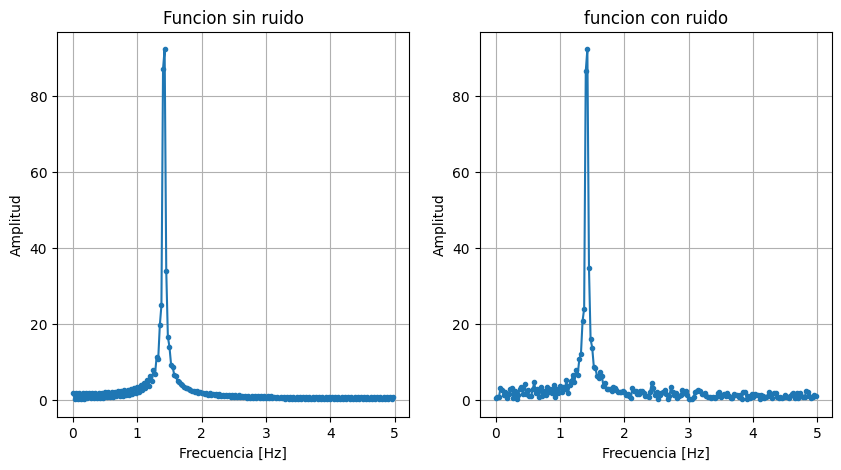

In [17]:
fig = plt.figure(figsize=(10,5))

#plt.scatter(frecuencias,FF)


plt.subplot(1,2,1)
plt.plot(frecuencias,FF,".-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Funcion sin ruido")
plt.grid()

plt.subplot(1,2,2)
plt.plot(frecuencias,FF2,".-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("funcion con ruido")
plt.grid()

1. Si se le agrega ruido a la señal en (y) entonces la funcion de fourier se nota mas dispersa pero siguen existiendo los mismos picos con una pequeña diferencia en el maximo aproximadamente de mas o menos 0.2 unidades.

## Punto 3  
Para la señal de prueba del punto anterior, y con el algoritmo de su elección, encuentre el pico principal de la norma de la transformada, y estime el ancho a media altura (FWHM).
Cambie sólo el número de muestras 𝑁 . ¿Cambia la posición del pico o su ancho? ¿Por qué?
Cambie sólo el rango de tiempo $t_{max}$ ¿Cambia la posición del pico o su ancho? ¿Por qué?

Hacemos una interpolacion alrededor de la frecuencia principal para determianr el FWHM

[0.064984]
91.92960073579404
1.4249999999999998


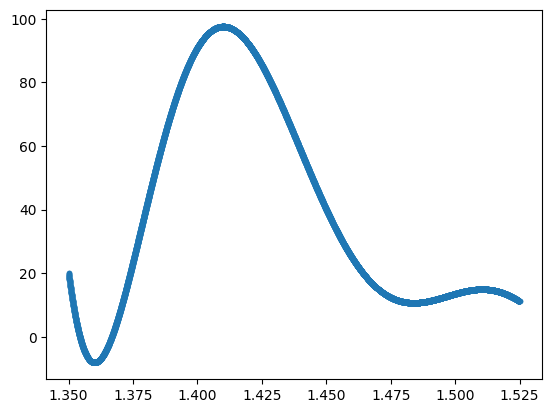

In [909]:

numero=np.max(FF)/2
maximo=np.argmax(FF)
Lista_x=[frecuencias[maximo-3],frecuencias[maximo-2],frecuencias[maximo-1],frecuencias[maximo],frecuencias[maximo+1],frecuencias[maximo+2],frecuencias[maximo+3],frecuencias[maximo+4]]
Lista_y=[FF[maximo-3],FF[maximo-2],FF[maximo-1],FF[maximo],FF[maximo+1],FF[maximo+2],FF[maximo+3],FF[maximo+4]]

coeficientes = np.polyfit(Lista_x, Lista_y, 6)
polinomio = np.poly1d(coeficientes)
x_ajustado = np.linspace(np.min(Lista_x), np.max(Lista_x), 10000)
y_ajustado = polinomio(x_ajustado)
plt.plot(x_ajustado,y_ajustado,".-")

diferencia=np.abs(numero-y_ajustado)
lista=sorted(diferencia)
numero1=np.where(diferencia==lista[0])
numero2=np.where(diferencia==lista[1])
#numero3=np.where(diferencia==lista[2])
#numero4=np.where(diferencia==lista[3])

lista1=[numero1,numero2]
numeros=[]
for i in lista1:
    numero=x_ajustado[i]
    numeros.append(numero)


fwhm=abs(numeros[1]-numeros[0])
print(fwhm)
print(np.max(FF))
print(frecuencias[maximo])


El ancho a media altura es aproximadamente 0.0647 a 0.0651
1. Al cambiar el numero de muestras el pico si cambia de posicion mas sin embargo el fwhm se mantiene "constante", ya que al cambiar el numero de muestras afecta la ecuacion para la transformada de fourier y en consecuencia hay una mejor resolucion permitiendo una frecuencia mas exacta
2. el pico se mantiane "constante" mas sin embargo la frecuencia del pico cambia. por otro lado el FWHM cambia ya que a mayor tiempo mas angosto es el pico de la transformada. 

## Punto 4  
Si agregamos ruido en la variable 𝑡, podemos superar el límite de Nyquist. Cree una señal de prueba con una frecuencia mucho mayor a la frecuencia de muestreo, evaluada en puntos ligeramente distintos

In [90]:
N = 80
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)
frecuencias_2=np.linspace(0,5*Ny,len(ts))

In [91]:
Fs=abs(fourier(ts, ys, frecuencias_2))

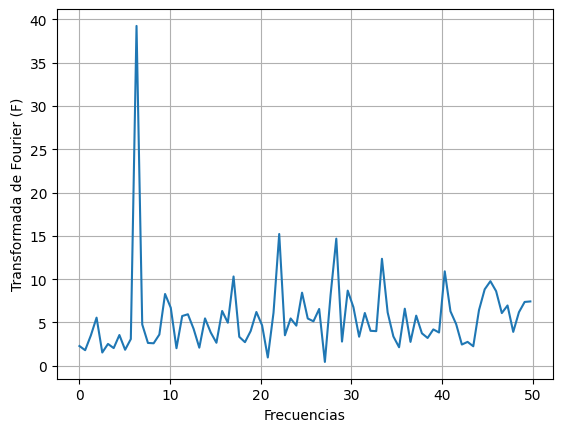

In [92]:
plt.plot(frecuencias_2,Fs)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.grid()

34.13810969340687


Text(0, 0.5, 'Amplitud')

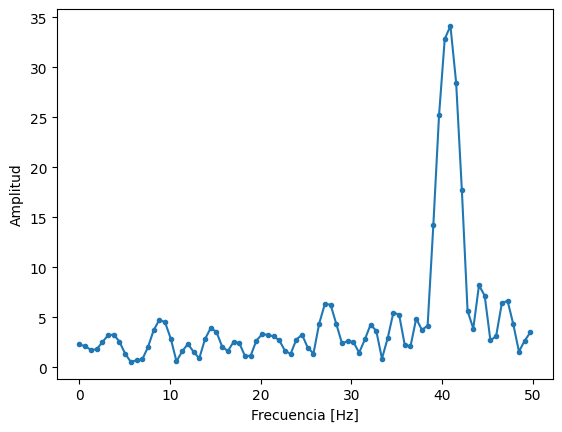

In [93]:


FF_2=[]

for i in range(len(frecuencias_2)):
    a=frecuencias[i]
    FS_2=fourier(ts,ys,a)
    FF_2.append(FS_2)

FF_2=np.abs(FF_2)

print(np.max(FF_2))

#plt.scatter(frecuencias,FF)
plt.plot(frecuencias_2,FF_2,".-")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")


Al graficar la trasnformada de fourier para la señal con ruido y sin ruido se obtiene que el pico mas alto es el mismo para ambos casos de modo que si se puede recuperar la frecuencia. Esto debido a que el ruido en la funcion se ve atenuado. 

## Punto 5  
Aplique esto a datos experimentales reales: https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat (el archivo contiene las columnas 𝑡, 𝑦 y 𝜎𝑦)
Descargue los datos, lea el archivo, y determine la frecuencia principal de la señal. ¿Cuál es la frecuencia de muestreo de los datos?
Una vez encontrada la frecuencia principal 𝑓𝑝, cree un diagrama de fase de la curva, definiendo
$$ \varphi = mod(𝑦𝑓𝑝, 1)$$
Grafique 𝑦 vs $\varphi$ y comente.

In [40]:
datos5 = urllib.request.urlopen('https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat').read().decode("utf-8")
df = pd.DataFrame([linea.split() for linea in datos5.splitlines()], columns=['t', 'y', 'sigma'])

# Convertir las columnas a float
t_data = df['t'].astype(float)
y_data = df['y'].astype(float)
df['sigma'] = df['sigma'].astype(float)

# Imprimir los datos
print(df)

              t       y  sigma
0    5262.50650  17.639  0.018
1    5264.50830  17.816  0.017
2    5265.59327  17.610  0.018
3    5266.50460  17.590  0.019
4    5267.50409  17.687  0.019
..          ...     ...    ...
396  7458.59979  17.868  0.016
397  7465.50239  17.588  0.013
398  7471.53717  17.943  0.030
399  7475.51366  17.941  0.017
400  7495.47865  17.875  0.025

[401 rows x 3 columns]


In [56]:
Y = (y_data) - (np.mean(y_data))

N = len(t_data)
f5 = np.arange(0,5,0.0001)
fft_y = abs(fourier(t_data,Y, f5))

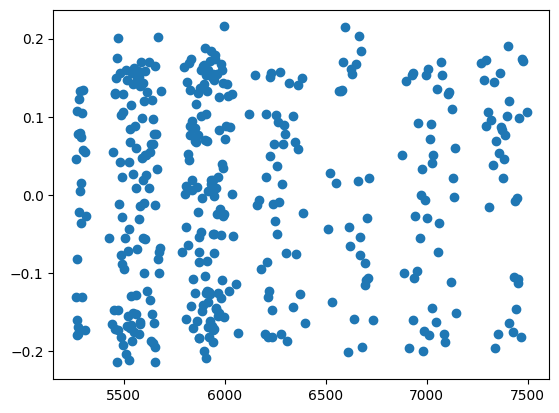

In [71]:
plt.scatter(t_data,Y)

Text(0, 0.5, 'Transformada de Fourier (F)')

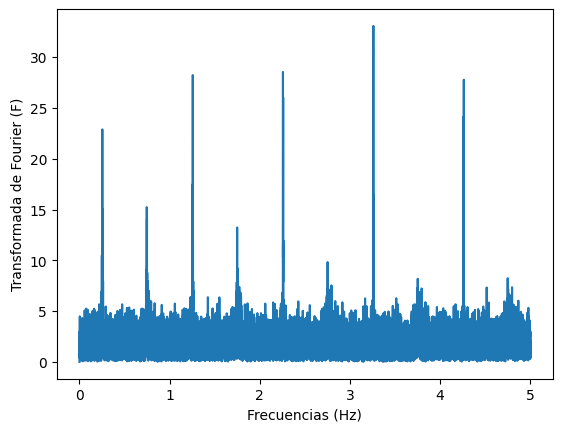

In [62]:
plt.plot(f5,fft_y)
plt.xlabel("Frecuencias (Hz)")
plt.ylabel("Transformada de Fourier (F)")

In [69]:
tmax = fft_y.max()
idx1 = abs( fft_y - (tmax))
idx1= idx1.argmin()
print(f5[idx1])

3.2592000000000003


In [64]:
freq_muestreo = 1/np.mean(np.diff(t_data))
print(freq_muestreo)

0.17913344776825815


In [66]:
Fase = np.mod(t_data*f5[idx1],1) 
#print(np.mod(17,1))
print(Fase)

0      0.561185
1      0.085451
2      0.621586
3      0.591792
4      0.849330
         ...   
396    0.068436
397    0.565389
398    0.233944
399    0.194121
400    0.264016
Name: t, Length: 401, dtype: float64


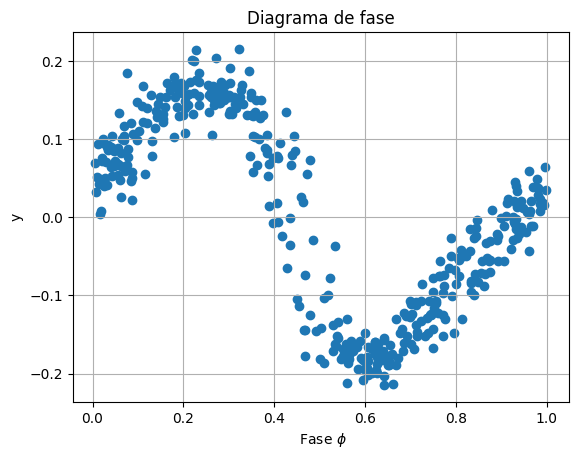

In [77]:
plt.scatter(Fase, Y)
plt.xlabel(" Fase $\phi}$ ")
plt.ylabel("y")
plt.title('Diagrama de fase')
plt.grid(True)
plt.show()


La gráfica revela el ciclo de los datos. En la función 
$\varphi$ al multiplicar cada punto de tiempo por la frecuencia principal, se calcula el avance temporal en términos de ciclos completos. Luego, con la operación $mod() $ se obtiene la fracción de un período completo, es decir, el valor dentro de un ciclo que varía entre 0 y 1. Esto permite visualizar el comportamiento real de los datos dentro de un ciclo periódico. 